## Natural Language Inference Task: EDA & Baseline Models

In [331]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
np.random.seed(1234)
random.seed(1234)

### Import training data 

In [332]:
df = pd.read_csv('snli/snli_1.0_train.txt', delimiter = "\t")
df.head(3)

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [65]:
def sentence_length(row):
    row = row.replace(".", "")
    row = row.replace(",", "")
    token_list = row.split()
    return len(token_list)

In [66]:
# Train Data
df = pd.read_csv('snli/snli_1.0_train.txt', delimiter = "\t")
df = df[["sentence1", "sentence2", "gold_label"]]
df = df.dropna()
df["sentence1 length"] = df["sentence1"].apply(sentence_length)
df["sentence2 length"] = df["sentence2"].apply(sentence_length)
sentence1_average = df["sentence1 length"].mean()
sentence2_average = df["sentence2 length"].mean()
print(sentence1_average)
print(sentence2_average)

12.850345181097381
7.416145895816747


In [67]:
# Dev Data
df = pd.read_csv('snli/snli_1.0_dev.txt', delimiter = "\t")
df = df[["sentence1", "sentence2", "gold_label"]]
df = df.dropna()
df["sentence1 length"] = df["sentence1"].apply(sentence_length)
df["sentence2 length"] = df["sentence2"].apply(sentence_length)
sentence1_average = df["sentence1 length"].mean()
sentence2_average = df["sentence2 length"].mean()
print(sentence1_average)
print(sentence2_average)

13.9605
7.5154


In [68]:
# Test Data
df = pd.read_csv('snli/snli_1.0_test.txt', delimiter = "\t")
df = df[["sentence1", "sentence2", "gold_label"]]
df = df.dropna()
df["sentence1 length"] = df["sentence1"].apply(sentence_length)
df["sentence2 length"] = df["sentence2"].apply(sentence_length)
sentence1_average = df["sentence1 length"].mean()
sentence2_average = df["sentence2 length"].mean()
print(sentence1_average)
print(sentence2_average)

13.9414
7.4984


In [69]:
sentence1_distribution = pd.DataFrame(data={"sentence length": df["sentence1 length"].value_counts().index, 
                                            "frequency": list(df["sentence1 length"].value_counts())})
sentence1_distribution = sentence1_distribution.sort_values(by="sentence length")
sentence1_distribution.head()

,sentence length,frequency
36,2,6
35,3,12
23,4,66
17,5,180
13,6,360


In [70]:
sentence2_distribution = pd.DataFrame(data={"sentence length": df["sentence2 length"].value_counts().index, 
                                            "frequency": list(df["sentence2 length"].value_counts())})
sentence2_distribution = sentence2_distribution.sort_values(by="sentence length")
sentence2_distribution.head()

,sentence length,frequency
28,1,1
18,2,17
9,3,275
4,4,1063
2,5,1260


In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


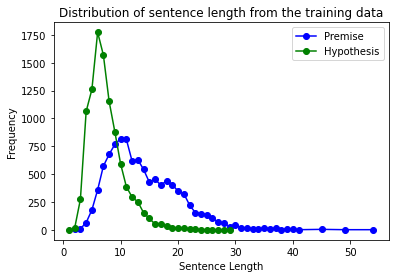

In [72]:
plt.plot("sentence length", "frequency", "bo-", data=sentence1_distribution, label="Premise")
plt.plot("sentence length", "frequency", "go-", data=sentence2_distribution, label="Hypothesis")
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title("Distribution of sentence length from the training data")
plt.legend()

In [73]:
df_train = pd.read_csv('snli/snli_1.0_train.txt', delimiter = "\t")
df_dev = pd.read_csv('snli/snli_1.0_dev.txt', delimiter = "\t")
df_test = pd.read_csv('snli/snli_1.0_test.txt', delimiter = "\t")

dfs = [df_train, df_dev, df_test]
df_final = pd.concat(dfs)

df_final = df_final[["gold_label", "sentence1", "sentence2"]]

In [74]:
def sentence_length(row):
    row = row.replace(".", "")
    row = row.replace(",", "")
    token_list = row.split()
    return len(token_list)

df_final = df_final.dropna()
df_final["sentence1 length"] = df_final["sentence1"].apply(sentence_length)
df_final["sentence2 length"] = df_final["sentence2"].apply(sentence_length)

sentence1_distribution = pd.DataFrame(data={"sentence length": df_final["sentence1 length"].value_counts().index, 
                                            "frequency": list(df_final["sentence1 length"].value_counts())})
sentence1_distribution = sentence1_distribution.sort_values(by="sentence length")

sentence2_distribution = pd.DataFrame(data={"sentence length": df_final["sentence2 length"].value_counts().index, 
                                            "frequency": list(df_final["sentence2 length"].value_counts())})
sentence2_distribution = sentence2_distribution.sort_values(by="sentence length")

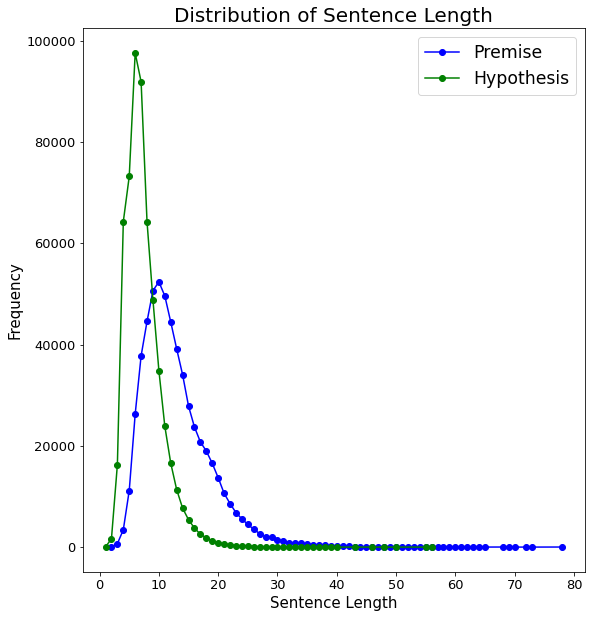

In [75]:
#fig = plt.figure()
plt.figure(figsize=(9, 10))
plt.plot("sentence length", "frequency", "bo-", data=sentence1_distribution, label="Premise")
plt.plot("sentence length", "frequency", "go-", data=sentence2_distribution, label="Hypothesis")
plt.xlabel('Sentence Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Distribution of Sentence Length", fontsize=20)
plt.legend(fontsize="xx-large")
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.savefig("distribution_sentence.png")
#fig.save("distribution_sentence.png")

In [78]:
df_final.head()

,gold_label,sentence1,sentence2,sentence1 length,sentence2 length
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,11,9
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",11,9
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",11,7
3,neutral,Children smiling and waving at camera,They are smiling at their parents,6,6
4,entailment,Children smiling and waving at camera,There are children present,6,4


In [ ]:
from collections import Counter
d = Counter()

s = "A person on a horse jumps over a broken down airplane."
s = s.replace(".", "")
t = s.split()
d.update(t)
d

In [ ]:
from collections import Counter
def tokenize(arrays): 
    word_count_dict = Counter()
    for array in arrays:
        array = array.lower()
        array = array.replace(".", "")
        token_list = array.split()
        word_count_dict.update(token_list)
    return word_count_dict

In [ ]:
df["gold_label"].value_counts()

### Data Cleaning for Baseline Models

In [333]:
df_train = pd.read_csv('snli/snli_1.0_train.txt', delimiter = "\t")
df_dev = pd.read_csv('snli/snli_1.0_dev.txt', delimiter = "\t")
df_test = pd.read_csv('snli/snli_1.0_test.txt', delimiter = "\t")

In [334]:
# delete any rows that have no definite gold_label
train_data = df_train.copy()[["gold_label", "sentence1", "sentence2"]]
train_data = train_data[train_data["gold_label"] != "-"]
train_data = train_data.dropna()

dev_data = df_dev.copy()[["gold_label", "sentence1", "sentence2"]]
dev_data = dev_data[dev_data["gold_label"] != "-"]
dev_data = dev_data.dropna()

test_data = df_test.copy()[["gold_label", "sentence1", "sentence2"]]
test_data = test_data[test_data["gold_label"] != "-"]
test_data = test_data.dropna()

In [335]:
train_data.head(2)

,gold_label,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."


In [336]:
dev_data.head(2)

,gold_label,sentence1,sentence2
0,neutral,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...
1,entailment,Two women are embracing while holding to go pa...,Two woman are holding packages.


In [337]:
test_data.head(2)

,gold_label,sentence1,sentence2
0,neutral,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,entailment,This church choir sings to the masses as they ...,The church is filled with song.


In [339]:
# reduce the training size
training_data_length = 45948
train_data = train_data.iloc[:training_data_length]

In [340]:
# encode the labels

from sklearn import preprocessing

labels_list = list(train_data["gold_label"].value_counts().index)
le = preprocessing.LabelEncoder()
le.fit(labels_list)

train_data["encoded_label"] = le.transform(train_data["gold_label"])
dev_data["encoded_label"] = le.transform(dev_data["gold_label"])
test_data["encoded_label"] = le.transform(test_data["gold_label"])

train_data_encoded = train_data.drop(["gold_label"], axis=1)
dev_data_encoded = dev_data.drop(["gold_label"], axis=1)
test_data_encoded = test_data.drop(["gold_label"], axis=1)

train_data_encoded.head(3)

,sentence1,sentence2,encoded_label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,2
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1


In [341]:
def clean_data(row):
    output = row.lower()
    output = output.replace(".", "")
    output = output.replace("!", "")
    output = output.replace("?", "")
    output = output.replace(",", "")
    return output

train_data_encoded["sentence1"] = train_data_encoded["sentence1"].apply(clean_data)
dev_data_encoded["sentence1"] = dev_data_encoded["sentence1"].apply(clean_data)
test_data_encoded["sentence1"] = test_data_encoded["sentence1"].apply(clean_data)

train_data_encoded["sentence2"] = train_data_encoded["sentence2"].apply(clean_data)
dev_data_encoded["sentence2"] = dev_data_encoded["sentence2"].apply(clean_data)
test_data_encoded["sentence2"] = test_data_encoded["sentence2"].apply(clean_data)



In [342]:
train_data_encoded.head(2)

,sentence1,sentence2,encoded_label
0,a person on a horse jumps over a broken down a...,a person is training his horse for a competition,2
1,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,0


In [343]:
# to build vocab words
df_final["sentence1"] = df_final["sentence1"].apply(clean_data)
df_final["sentence2"] = df_final["sentence2"].apply(clean_data)

In [344]:
df_final.head(2)

,gold_label,sentence1,sentence2,sentence1 length,sentence2 length
0,neutral,a person on a horse jumps over a broken down a...,a person is training his horse for a competition,11,9
1,contradiction,a person on a horse jumps over a broken down a...,a person is at a diner ordering an omelette,11,9


### Baseline Models

#### Randomized Selection

In [345]:
df_dev = pd.read_csv('snli/snli_1.0_dev.txt', delimiter = "\t")
df_dev = df_dev[["gold_label", "sentence1", "sentence2"]]
df_dev = df_dev[df_dev["gold_label"] != "-"]
df_dev = df_dev.dropna()
gold_labels = list(df_dev["gold_label"])

possible_labels = ['neutral', 'entailment', 'contradiction']
random_pred = np.random.choice(possible_labels, len(df_dev))

print(f1_score(gold_labels, random_pred, average='macro'))
print(accuracy_score(gold_labels, random_pred))

0.3350542594575497
0.33509449298922983


#### Hypothesis-Only Baseline Model

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

df_training = pd.read_csv('snli/snli_1.0_train.txt', delimiter = "\t")
df_training = df_training[["gold_label", "sentence1", "sentence2"]]
df_training = df_training[df_training["gold_label"] != "-"]
df_training = df_training.dropna()

# reduce the training size
training_data_length = 45948
df_training = df_training.iloc[:training_data_length]

hypothesis_training = df_training["sentence2"]
training_labels = df_training["gold_label"]

df_dev = pd.read_csv('snli/snli_1.0_dev.txt', delimiter = "\t")
df_dev = df_dev[["gold_label", "sentence1", "sentence2"]]
df_dev = df_dev[df_dev["gold_label"] != "-"]
df_dev = df_dev.dropna()
hypothesis_dev = df_dev["sentence2"]
dev_labels = df_dev["gold_label"]

df_test = pd.read_csv('snli/snli_1.0_test.txt', delimiter = "\t")
df_test = df_test[["gold_label", "sentence1", "sentence2"]]
df_test = df_test[df_test["gold_label"] != "-"]
df_test = df_test.dropna()
hypothesis_test = df_test["sentence2"]

hypothesis_training = hypothesis_training.apply(clean_data)
hypothesis_dev = hypothesis_dev.apply(clean_data)
hypothesis_test = hypothesis_test.apply(clean_data)

In [352]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [353]:
tfidf_vec = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf_vec.fit_transform(hypothesis_training)
X_test = tfidf_vec.transform(hypothesis_dev)

In [354]:
le = preprocessing.LabelEncoder()
le.fit(["neutral", "contradiction", "entailment"])
training_labels = le.transform(training_labels)
dev_labels = le.transform(dev_labels)

In [355]:
print("creating the model")
model_logisticr = LogisticRegression()
print("fitting the model")
model_logisticr.fit(X_train, training_labels)
print("making predictions")
final_pred = model_logisticr.predict(X_test)

creating the model
fitting the model
making predictions


/Users/jessjkim/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print("creating the model")
model_svm = svm.SVC(class_weight="balanced", max_iter=5000)
print("fitting the model")
model_svm.fit(X_train, training_labels)
print("making predictions")
final_pred = model_svm.predict(X_test)

creating the model
fitting the model


/Users/jessjkim/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


making predictions


In [356]:
print(f1_score(dev_labels, final_pred, average='macro'))
print(accuracy_score(dev_labels, final_pred))

0.556109046935588
0.555984555984556
